In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D

In [6]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
import requests
from io import BytesIO

In [9]:
url='https://i.pinimg.com/564x/9c/a7/ef/9ca7ef81f546b7133267b94e48bf8ab2.jpg'

In [14]:
def return_image(url):
    try:
        response=requests.get(url)
        if response.status_code==200:
            image_bytes=BytesIO(response.content)
            image_array = cv.imdecode(np.asarray(bytearray(image_bytes.read()), dtype=np.uint8), cv.IMREAD_COLOR)
            return image_array
        else:
            print('Failed to fetch image. Status Code: ',response.status_code)
            return None
    except Exception as e:
        print('Error',str(e))
        return None

In [15]:
image_array=return_image(url)

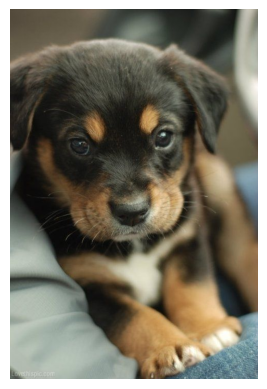

In [20]:
image=cv.cvtColor(image_array,cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [21]:
image.shape

(720, 483, 3)

In [23]:
image=cv.resize(image,(224,224))

In [24]:
image.shape

(224, 224, 3)

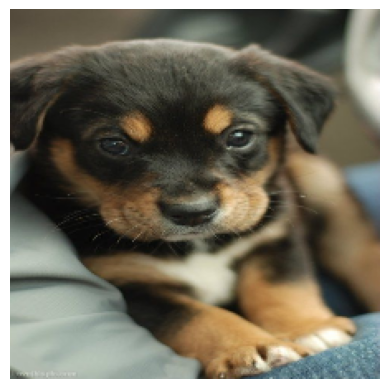

In [25]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [28]:
image=image.reshape((1,)+image.shape)

In [30]:
image.shape

(1, 224, 224, 3)

In [31]:
result=model.predict(image)

1/1 [==============================] - 0s 99ms/step


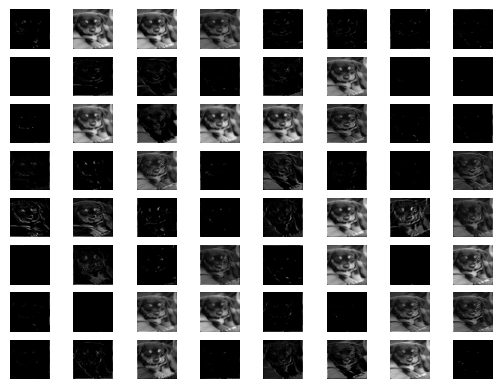

In [36]:
for i in range(64):
    feature_image=result[0,:,:,i]
    ax=plt.subplot(8,8,i+1)
    plt.imshow(feature_image,cmap='gray')
    ax.axis('off')
plt.show()